### Agent-Lab: Adaptive RAG Agent

Objective of this notebook is evaluating and adapting the implementation of [Adaptive RAG Agent](https://langchain-ai.github.io/langgraph/tutorials/rag/langgraph_adaptive_rag/).

#### Preparation steps:

Before executing the notebook perform the following preparation steps.

1. Start Docker containers: `docker compose up -d --build`

2. Verify application is up and running, with web browser: `http://localhost:18000/docs`

3. Inside project root directory, create a `.env` file with env vars with correct values:

    ```
    DEVELOPING="True"
    OLLAMA_ENDPOINT="http://localhost:11434"
    TAVILY_API_KEY="???"
    XAI_API_KEY="???"
    ```

---

In [1]:
%%capture
import json
import os

os.chdir("..")

from dotenv import load_dotenv

load_dotenv()

from IPython.display import Markdown, display

from notebooks import experiment_utils
from app.core.container import Container
from app.interface.api.messages.schema import MessageRequest

# graph rendering
import nest_asyncio
nest_asyncio.apply()

# start dependency injection container
container = Container()
container.init_resources()
container.wire(modules=[__name__])

In [2]:
# create agent
# agent = experiment_utils.create_ollama_agent(
#     agent_type="adaptive_rag",
#     llm_tag="llama3.2-vision:latest",
#     ollama_endpoint=os.getenv("OLLAMA_ENDPOINT")
# )

agent = experiment_utils.create_xai_agent(
    agent_type="adaptive_rag", llm_tag="grok-2", api_key=os.getenv("XAI_API_KEY")
)

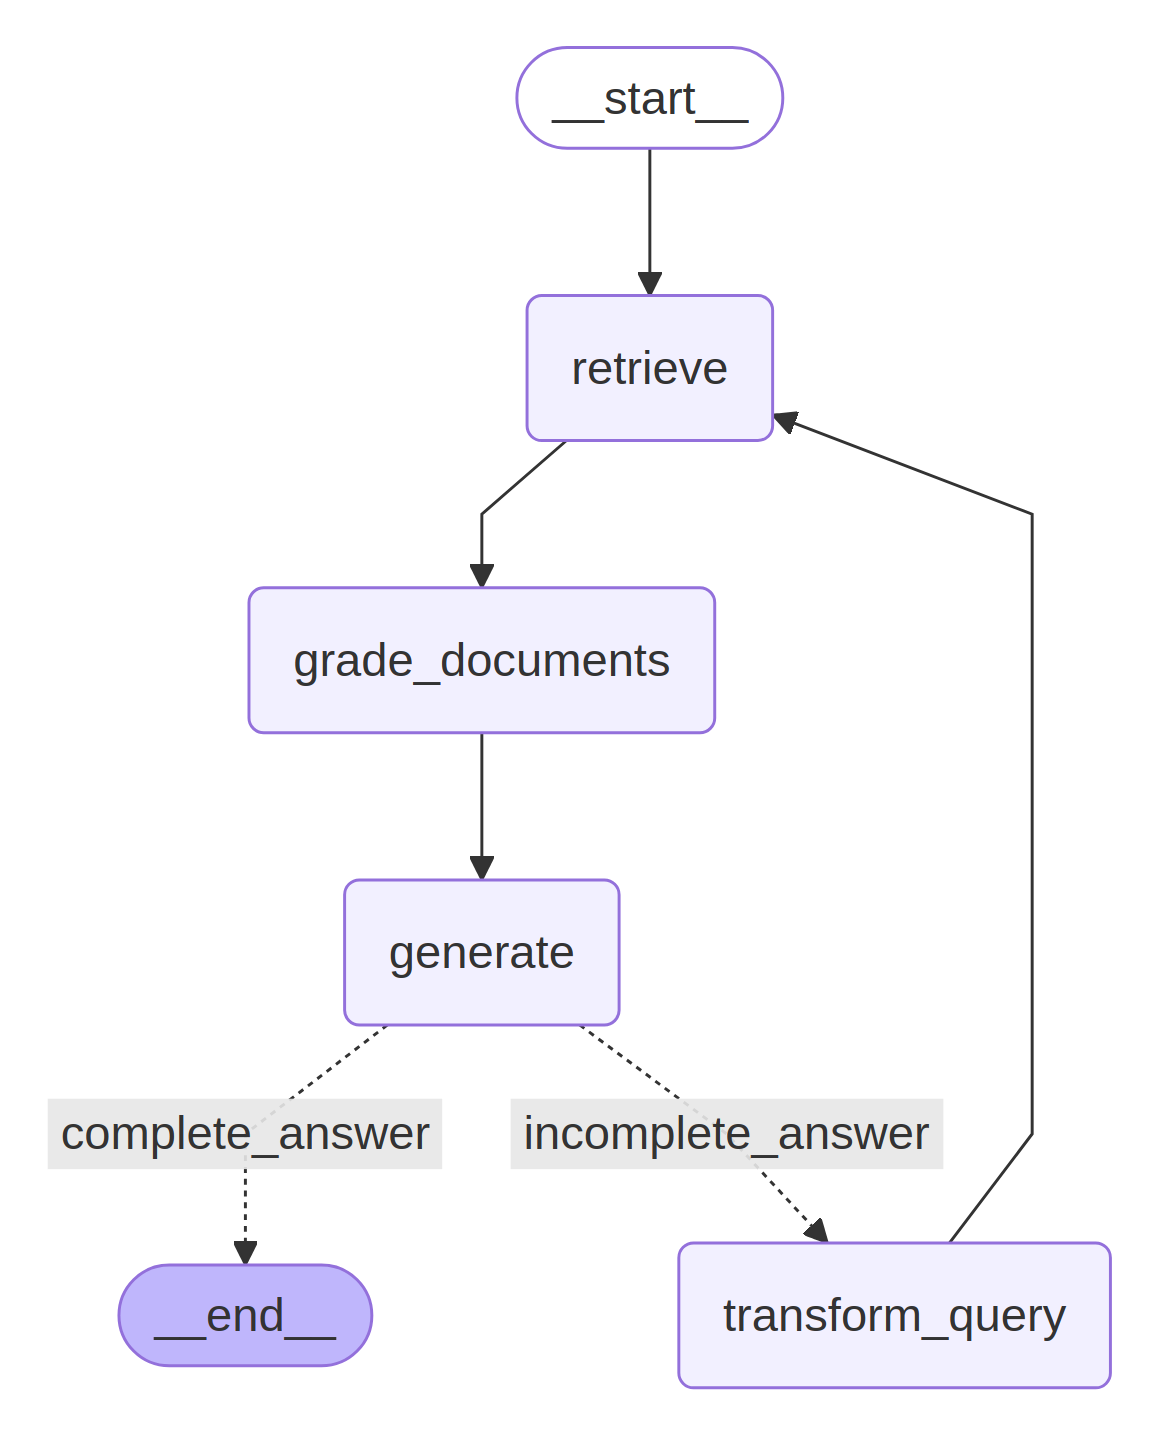

In [3]:
# get agent instance
adaptive_rag_agent = container.adaptive_rag_agent()

# get checkpointer instance
graph_persistence_factory = container.graph_persistence_factory()
checkpointer = graph_persistence_factory.build_checkpoint_saver()

# Create Graph
workflow_builder = adaptive_rag_agent.get_workflow_builder(agent["id"])
workflow = workflow_builder.compile(checkpointer=checkpointer)
experiment_utils.print_graph(workflow)

In [4]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=agent["id"],
)

inputs = adaptive_rag_agent.get_input_params(message)
config = adaptive_rag_agent.get_config(agent["id"])
result = workflow.invoke(inputs, config)
ai_message_content, workflow_state = adaptive_rag_agent.format_response(result)

In [5]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

According to Sun Tzu, the pinnacle of excellence is not achieved by fighting and winning battles, but by breaking the enemy's resistance without fighting. This involves strategic planning and actions that prevent the need for conflict, thereby achieving victory without bloodshed.

In [6]:
display(
    Markdown(
        f"**Workflow state:**\n```json\n{json.dumps(workflow_state, indent=2)}\n```"
    )
)

**Workflow state:**
```json
{
  "agent_id": "2d42b485-7cee-436f-9e4d-d4ec5212c44b",
  "query": "What is the pinnacle of excellence?",
  "collection_name": "static_document_data",
  "generation": "According to Sun Tzu, the pinnacle of excellence is not achieved by fighting and winning battles, but by breaking the enemy's resistance without fighting. This involves strategic planning and actions that prevent the need for conflict, thereby achieving victory without bloodshed.",
  "connection": "The query about the pinnacle of excellence is directly addressed in the context provided, which discusses Sun Tzu's philosophy on supreme excellence in warfare. The context emphasizes that true excellence in strategy is achieved not through combat, but by outmaneuvering the enemy to prevent conflict.",
  "documents": [
    "Hence to fight and conquer in all your battles is not supreme excellence; supreme excellence consists in breaking the enemy\u2019s resistance without fighting.\n\n[Here again, no modern strategist but will approve the words of the old Chinese general. Moltke\u2019s greatest triumph, the capitulation of the huge French army at Sedan, was won practically without bloodshed.]\n\nThus the highest form of generalship is to baulk the enemy\u2019s plans;",
    "Neither is it the acme of excellence if you fight and conquer and the whole Empire says, \"Well done!\"\n\n[True excellence being, as Tu Mu says: \"To plan secretly, to move surreptitiously, to foil the enemy\u2019s intentions and balk his schemes, so that at last the day may be won without shedding a drop of blood.\" Sun Tz\u016d reserves his approbation for things that\n\n\"the world\u2019s coarse thumb And finger fail to plumb.\"\n\nTo lift an autumn hair is no sign of great strength;",
    "Thus on the one hand we have ability to protect ourselves; on the other, a victory that is complete.\n\nTo see victory only when it is within the ken of the common herd is not the acme of excellence."
  ]
}
```

In [7]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Can you repeat my previous question and answer it again but this time in dutch?",
    agent_id=agent["id"],
)

inputs = adaptive_rag_agent.get_input_params(message)
config = adaptive_rag_agent.get_config(agent["id"])
result = workflow.invoke(inputs, config)
ai_message_content, workflow_state = adaptive_rag_agent.format_response(result)

In [8]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

Vorige vraag: Wat is de top van uitmuntendheid?
Antwoord: Volgens Sun Tzu is de top van uitmuntendheid niet bereikt door te vechten en veldslagen te winnen, maar door het verzet van de vijand te breken zonder te vechten. Dit houdt strategische planning en acties in die de noodzaak voor conflict voorkomen, waardoor overwinning zonder bloedvergieten wordt bereikt.

In [9]:
display(
    Markdown(
        f"**Workflow state:**\n```json\n{json.dumps(workflow_state, indent=2)}\n```"
    )
)

**Workflow state:**
```json
{
  "agent_id": "2d42b485-7cee-436f-9e4d-d4ec5212c44b",
  "query": "Can you repeat my previous question and answer it again but this time in dutch?",
  "collection_name": "static_document_data",
  "generation": "Vorige vraag: Wat is de top van uitmuntendheid?\nAntwoord: Volgens Sun Tzu is de top van uitmuntendheid niet bereikt door te vechten en veldslagen te winnen, maar door het verzet van de vijand te breken zonder te vechten. Dit houdt strategische planning en acties in die de noodzaak voor conflict voorkomen, waardoor overwinning zonder bloedvergieten wordt bereikt.",
  "connection": "The user requested their previous question about the pinnacle of excellence to be repeated and answered in Dutch, which directly relates to the provided context discussing Sun Tzu's philosophy on excellence in warfare.",
  "documents": []
}
```

In [10]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen maar dit keer in het Portugees?",
    agent_id=agent["id"],
)

inputs = adaptive_rag_agent.get_input_params(message)
config = adaptive_rag_agent.get_config(agent["id"])
result = workflow.invoke(inputs, config)
ai_message_content, workflow_state = adaptive_rag_agent.format_response(result)

In [11]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

Pergunta anterior: Qual é o auge da excelência?
Resposta: Segundo Sun Tzu, o auge da excelência não é alcançado lutando e vencendo batalhas, mas sim quebrando a resistência do inimigo sem lutar. Isso envolve planejamento estratégico e ações que previnem a necessidade de conflito, alcançando assim a vitória sem derramamento de sangue.

In [12]:
display(
    Markdown(
        f"**Workflow state:**\n```json\n{json.dumps(workflow_state, indent=2)}\n```"
    )
)

**Workflow state:**
```json
{
  "agent_id": "2d42b485-7cee-436f-9e4d-d4ec5212c44b",
  "query": "Kun je mijn vorige vraag en jouw antwoord herhalen maar dit keer in het Portugees?",
  "collection_name": "static_document_data",
  "generation": "Pergunta anterior: Qual \u00e9 o auge da excel\u00eancia?\nResposta: Segundo Sun Tzu, o auge da excel\u00eancia n\u00e3o \u00e9 alcan\u00e7ado lutando e vencendo batalhas, mas sim quebrando a resist\u00eancia do inimigo sem lutar. Isso envolve planejamento estrat\u00e9gico e a\u00e7\u00f5es que previnem a necessidade de conflito, alcan\u00e7ando assim a vit\u00f3ria sem derramamento de sangue.",
  "connection": "The user requested the previous question and answer to be repeated in Portuguese, which directly relates to the provided context of previous questions and answers about the pinnacle of excellence.",
  "documents": []
}
```